In [1]:
%matplotlib inline
import sys
from pathlib import Path
import numpy as np
from astropy import table
from scipy import interpolate, integrate, special
from matplotlib import colors
from tqdm.notebook import tqdm

import betterplotlib as bpl
bpl.set_style()

In [2]:
sys.path.append("/Users/gillenb/code/legus_sizes/analysis/mass_radius_relation")
from mass_radius_utils_mcmc_fitting import selection_probability

# Testing happens down here

In [3]:
d_log_m = 0.1
d_log_t = 0.1
log_m_grid = np.arange(1, 6.01, d_log_m)
log_t_grid = np.arange(6, 10.01, d_log_t)

fraction = np.zeros((log_m_grid.size, log_t_grid.size))

beta = 0.2
r_4 = 1.5
sigma = 0.2

for m_idx in tqdm(range(log_m_grid.size)):
    log_m = log_m_grid[m_idx]
    for t_idx in range(log_t_grid.size):
        log_t = log_t_grid[t_idx]
        
        fraction[m_idx, t_idx] = selection_probability(log_m, log_t, beta, np.log10(r_4), sigma)

Text(0.04, 0.96, '$\\beta$ = 0.2\n$r_4$=1.5\n$\\sigma$=0.2')

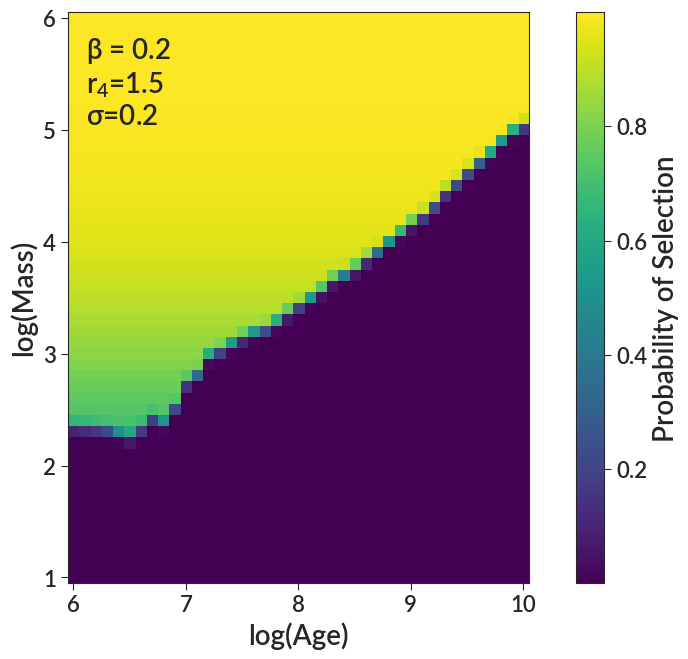

In [4]:
fig, ax = bpl.subplots()

limits = (
    min(log_t_grid) - 0.5 * d_log_t,
    max(log_t_grid) + 0.5 * d_log_t,
    min(log_m_grid) - 0.5 * d_log_m,
    max(log_m_grid) + 0.5 * d_log_m,
)
im = ax.imshow(
    fraction,
    origin="lower",
#     norm=colors.LogNorm(),
    extent=limits,
    # This scalar aspect ratio is calculated to ensure the pixels are square
    aspect=((max(log_t_grid) - min(log_t_grid)) / log_t_grid.size) / ((max(log_m_grid) - min(log_m_grid)) / log_m_grid.size),
)

cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Probability of Selection")

ax.set_limits(*limits)
ax.add_labels("log(Age)", "log(Mass)")
ax.easy_add_text(f"$\\beta$ = {beta}\n$r_4$={r_4}\n$\sigma$={sigma}", "upper left")